<a href="https://colab.research.google.com/github/felipemaiapolo/infoselect/blob/master/InfoSelect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***InfoSelect*** - Mutual Information Based Feature Selection in Python




### *Felipe Maia Polo (felipemaiapolo), Felipe Leno da Silva (f-leno)*


## Contents
1. [ Introduction ](#1)
2. [ Installing *InfoSelect*  ](#2)
3. [ Main functionalities of *InfoSelect* ](#3)
4. [ Examples of *InfoSelect* use ](#4)
5. [ References ](#5)

--------------

<a name="1"></a>
## 1\. Introduction 

In this package we implement the ideas proposed by [1, 2] in order to make variable/feature selection prior to regression and classification tasks using Gaussian Mixture Models (GMMs) to estimate the Mutual Information between labels and features. This is an efficient and well-performing alternative and was used in a recent work [3] by one of us.

If you use our package in your research, you can cite it as follows:

    @article{maia2022effective,
      title={Effective sample size, dimensionality, and generalization in covariate shift adaptation},
      author={Maia Polo, Felipe and Vicente, Renato},
      journal={Neural Computing and Applications},
      pages={1--13},
      year={2022},
      publisher={Springer}
    }


    @misc{polo2020infoselect,
      title={InfoSelect - Mutual Information Based Feature Selection in Python},
      author={Polo, Felipe Maia and Da Silva, Felipe Leno},
      journal={GitHub: github.com/felipemaiapolo/infoselect},
      year={2020}
    }


--------------

<a name="2"></a>
## 2\. Installing *InfoSelect* 

You can install the package from
[PyPI](https://pypi.org/project/infoselect/)

In [ ]:
!pip install infoselect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for infoselect: filename=infoselect-1.0.2-py3-none-any.whl size=11098 sha256=b7a85d21cbb2321bb7ef255ab35cf5cc658b54c1aa6246f2d77dfa10f86e35ff
  Stored in directory: /root/.cache/pip/wheels/25/30/1d/12f3becf201de9376e624644d18123c6ba012a535162d7b26a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=8c6a08102d8ab38ed2ee23053cbcda0df2f0fbb0a0dc472ee3d9123189c65c68
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built infoselect sklearn


<a name="3"></a>
## 3\. Main functionalities of *InfoSelect* 

<a name="3.1"></a>
### 3.1\. Main Class `SelectVars`

This class is used to order features/variables according to their importance and making the selection itself. Next we detail its methods:

1. `__init__(self, gmm, selection_mode = 'forward')`
    - **gmm**: 
        - If <img src="https://render.githubusercontent.com/render/math?math=Y"> is *non*-categorical: a [Scikit-Learn GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) fitted in (y,X) - y should always be in the first column;
        - If <img src="https://render.githubusercontent.com/render/math?math=Y"> is categorical: a Python dictionary containing one [Scikit-Learn GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) fitted in X conditional on each category - something like X[y==c,:]. Format `{0:gmm0, 1:gmm1, ..., C:gmmC}`;
        - Please use auxiliary function `get_gmm` below if you want to use `covariance_type!='full`.
    - **selection_mode**: `forward`/`backward` algorithms.
        - `forward` selection: we start with an empty set of features and then select the feature that has the largest estimated mutual information with the target variable and. At each subsequent step, we select the feature that marginally maximizes the estimated mutual information of the target and all the chosen features so far. We stop when we have selected/ordered all the features;
        - `backward` elimination: we start with the full set of features and then at each step, we eliminate the feature that marginally maximizes the estimated mutual information of the target and all the remaining features. We stop when we have no more features to eliminate;

2. `fit(self, X, y, verbose=True, eps=0)`
    - **X**: numpy array of features; 
    - **y**: numpy array of labels;
    - **verbose**: print or not to print!?
    - **eps**: small value so we can avoid taking log of zero in some cases .

3. `get_info(self)`: 
    - This function creates and outputs a Pandas DataFrame with the history of feature selection/elimination. The `mi_mean` column gives the estimated Mutual Information while `mi_error` gives the standard error of that estimate. On the other hand, the `delta` column gives us the percentual information loss/gain in that round, relatively to the latter;
    
4. `plot_delta(self)`: 
    - This function plots the history of percentual changes in the mutual information.
    
5. `plot_mi(self)`: 
    - This function plots the history of the mutual information.
    
6. `transform(self, X, rd)`: 
    - This function takes **X** and transforms it in **X_new**, maintaining the features of Round `rd`; 
 
<a name="3.2"></a>
### 3.2\. Auxiliary Function `get_gmm`

1. `get_gmm(X, y, y_cat=False, num_comps=[2,5,10,15,20,30,40,50], val_size=0.33, reg_covar=1e-06, covariance_type="full", random_state=42)`: 

    - Firstly, this function validate the number of GMM components, for each model it will train, in a holdout set using the mean log likelihood of samples in that set. If Y is non-categorical, it returns a [Scikit-Learn GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) fitted in (y,X) model (in this order). On the other hand, if Y is categorical it returns a Python dictionary containing one [Scikit-Learn GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) fitted in X conditional on each category - something like X[y==c,:]. Format `{0:gmm0, 1:gmm1, ..., C:gmmC}`.

        - **X**: numpy array of features; 
        - **y**: numpy array of labels;
        - **y_cat**: if we should consider Y as categorical;
        - **num_comps**: numbers of GMM components to be validated;
        - **val_size**: size of holdout set used to validate the GMMs numbers of components;
        - **reg_covar**: non-negative regularization added to the diagonal of covariance. Ensures the covariance matrices are non-singular.
        - **covariance_type**: one of the following options:'full','tied','diag','spherical'. See [Scikit-Learn GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
        - **random_state**: seed.

--------------------

<a name="4"></a>
## 4\. Examples of *InfoSelect* use

Loading Packages:

In [ ]:
import infoselect as inf
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

### 1.1\. Dataset

We generate a dataset $D$ sampled from $\mathcal{D}=\{(X_{0,i},...,X_{6,i},Y_i)\}_{i=1}^{n}$ similar to the one in [here](https://www.cs.toronto.edu/~delve/data/add10/desc.html), in which $Y_i$ is given by

<br>
\begin{align}
Y_i &= f(X_{0,i},...,X_{6,i}) + \epsilon_i \\[.5em]
&=10\cdot \sin(\pi X_{0,i}  X_{1,i}) + 20 (X_{2,i}-0.5)^2 + 10 X_{3,i} + 5 X_{4,i} + \epsilon_i
\end{align}
<br>

Where $X_{0,i},...,X_{6,i} \overset{iid}{\sim} U[0,1]$ and $\epsilon_i \sim N(0,1)$ independent from all the other random variables for all $i\in [n]$. In the following we set $n=20000$:

In [ ]:
def f(X,e): return 10*np.sin(np.pi*X[:,0]*X[:,1]) + 20*(X[:,2]-.5)**2 + 10*X[:,3] + 5*X[:,4] + e

In [ ]:
n=20000
d=7

X = np.random.uniform(0,1,d*n).reshape((n,d))
e = np.random.normal(0,1,n)
y = f(X,e)

X.shape, y.shape

((20000, 7), (20000,))

### 1.2\. Selecting Features for a Regression Task

Training (and validating) GMM:

In [ ]:
%%time

gmm = inf.get_gmm(X, y)

CPU times: user 29.7 s, sys: 35.4 s, total: 1min 5s
Wall time: 56.6 s


In [ ]:
gmm

GaussianMixture(n_components=20, random_state=42)

Ordering features by their importances using the *Backward Elimination* algorithm:

In [ ]:
select = inf.SelectVars(gmm, selection_mode = 'backward')
select.fit(X, y, verbose=True)    

Let's start...

Round =   0   |   Î =  1.49   |   Δ%Î =  0.00   |   Features=[0, 1, 2, 3, 4, 5, 6]
Round =   1   |   Î =  1.49   |   Δ%Î = -0.00   |   Features=[0, 1, 2, 3, 4, 6]
Round =   2   |   Î =  1.49   |   Δ%Î = -0.00   |   Features=[0, 1, 2, 3, 4]
Round =   3   |   Î =  1.02   |   Δ%Î = -0.32   |   Features=[0, 1, 3, 4]
Round =   4   |   Î =  0.76   |   Δ%Î = -0.25   |   Features=[0, 1, 3]
Round =   5   |   Î =  0.40   |   Δ%Î = -0.48   |   Features=[0, 3]
Round =   6   |   Î =  0.22   |   Δ%Î = -0.45   |   Features=[3]


Checking history:

In [ ]:
select.get_info()

,rounds,mi_mean,mi_error,delta,num_feat,features
0,0,1.493517,0.006161,0.000000,7,"[0, 1, 2, 3, 4, 5, 6]"
1,1,1.492046,0.006155,-0.000985,6,"[0, 1, 2, 3, 4, 6]"
2,2,1.490563,0.006151,-0.000994,5,"[0, 1, 2, 3, 4]"
3,3,1.019008,0.005728,-0.316360,4,"[0, 1, 3, 4]"
4,4,0.761231,0.005409,-0.252968,3,"[0, 1, 3]"
5,5,0.398240,0.005075,-0.476848,2,"[0, 3]"
6,6,0.217122,0.003859,-0.454796,1,[3]


It is possible to see that the estimated mutual information is untouched until Round 2, when it varies around -$30\%$.

Since there is a 'break' in Round 2, we should choose to stop the algorithm at theta round. This will be clear in the Mutual Information history plot that follows:

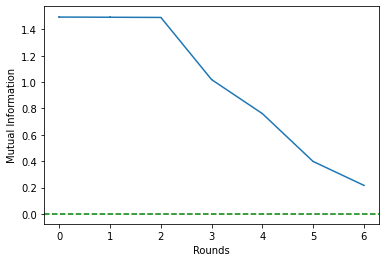

In [ ]:
select.plot_mi()

Plotting the percentual variations of the mutual information between rounds:

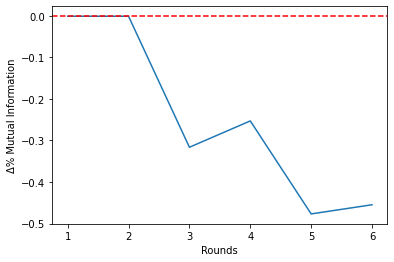

In [ ]:
select.plot_delta()

Making the selection choosing to stop at Round 2:

In [ ]:
X_new = select.transform(X, rd=2)

X_new.shape

(20000, 5)

### 1.3\. Selecting Features for a Classification Task

Categorizing $Y$:

In [ ]:
ind0 = (y<np.percentile(y, 33))
ind1 = (np.percentile(y, 33)<=y) & (y<np.percentile(y, 66))
ind2 = (np.percentile(y, 66)<=y)

y[ind0] = 0
y[ind1] = 1
y[ind2] = 2

y=y.astype(int)

In [ ]:
y[:15]

array([2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0])

Training (and validating) GMMs:

In [ ]:
%%time 

gmm=inf.get_gmm(X, y, y_cat=True)

CPU times: user 20 s, sys: 25 s, total: 45.1 s
Wall time: 26.3 s


In [ ]:
gmm

{0: GaussianMixture(n_components=15, random_state=42),
 1: GaussianMixture(n_components=20, random_state=42),
 2: GaussianMixture(n_components=20, random_state=42)}

Ordering features by their importances using the *Forward Selection* algorithm:

In [ ]:
select=inf.SelectVars(gmm, selection_mode='forward')
select.fit(X, y, verbose=True)    

Let's start...

Round =   0   |   Î =  0.00   |   Δ%Î =  0.00   |   Features=[]
Round =   1   |   Î =  0.15   |   Δ%Î =  0.00   |   Features=[3]
Round =   2   |   Î =  0.29   |   Δ%Î =  0.92   |   Features=[3, 0]
Round =   3   |   Î =  0.53   |   Δ%Î =  0.84   |   Features=[3, 0, 1]
Round =   4   |   Î =  0.64   |   Δ%Î =  0.22   |   Features=[3, 0, 1, 4]
Round =   5   |   Î =  0.80   |   Δ%Î =  0.24   |   Features=[3, 0, 1, 4, 2]
Round =   6   |   Î =  0.80   |   Δ%Î = -0.00   |   Features=[3, 0, 1, 4, 2, 5]
Round =   7   |   Î =  0.80   |   Δ%Î = -0.00   |   Features=[3, 0, 1, 4, 2, 5, 6]


Checking history:

In [ ]:
select.get_info()

,rounds,mi_mean,mi_error,delta,num_feat,features
0,0,0.000000,0.000000,0.000000,0,[]
1,1,0.149416,0.003683,0.000000,1,[3]
2,2,0.287263,0.004519,0.922574,2,"[3, 0]"
3,3,0.529389,0.004487,0.842871,3,"[3, 0, 1]"
4,4,0.643655,0.004204,0.215846,4,"[3, 0, 1, 4]"
5,5,0.800564,0.003351,0.243778,5,"[3, 0, 1, 4, 2]"
6,6,0.800543,0.003454,-0.000027,6,"[3, 0, 1, 4, 2, 5]"
7,7,0.798431,0.003599,-0.002637,7,"[3, 0, 1, 4, 2, 5, 6]"


It is possible to see that the estimated mutual information is untouched from Round 6 onwards.

Since there is a 'break' in Round 5, we should choose to stop the algorithm at theta round. This will be clear in the Mutual Information history plot that follows:

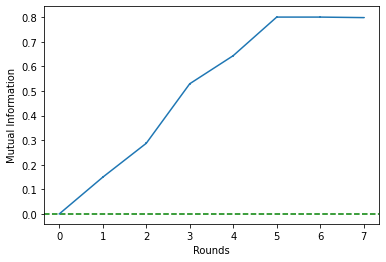

In [ ]:
select.plot_mi()

Plotting the percentual variations of the mutual information between rounds:

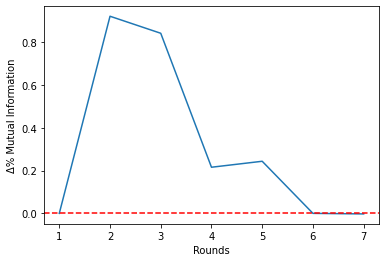

In [ ]:
select.plot_delta()


Making the selection choosing to stop at Round 5:

In [ ]:
X_new = select.transform(X, rd=5)

X_new.shape

(20000, 5)

<a name="5"></a>
## 5\. References

[1] Eirola, E., Lendasse, A., & Karhunen, J. (2014, July). Variable selection for regression problems using Gaussian mixture models to estimate mutual information. In 2014 International Joint Conference on Neural Networks (IJCNN) (pp. 1606-1613). IEEE.

[2] Lan, T., Erdogmus, D., Ozertem, U., & Huang, Y. (2006, July). Estimating mutual information using gaussian mixture model for feature ranking and selection. In The 2006 IEEE International Joint Conference on Neural Network Proceedings (pp. 5034-5039). IEEE.

[3] Maia Polo, F., & Vicente, R. (2022). Effective sample size, dimensionality, and generalization in covariate shift adaptation. Neural Computing and Applications, 1-13.


